In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df_train = pd.read_hdf("./output/filtered_jetclass_train.h5", key="df")
df_val = pd.read_hdf("./output/filtered_jetclass_val.h5", key="df")
df_test = pd.read_hdf("./output/filtered_jetclass_test.h5", key="df")

print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(4000000, 18)
(1000000, 18)
(4000000, 18)


In [4]:
df_test

,jet_p_top_ParT_full,jet_p_top_ParT_kin,label_top,jet_pt,jet_eta,jet_phi,jet_energy,jet_nparticles,jet_sdmass,jet_tau1,jet_tau2,jet_tau3,jet_tau4,aux_genpart_eta,aux_genpart_phi,aux_genpart_pid,aux_genpart_pt,aux_truth_match
0,9.983645e-01,9.522571e-01,1.0,624.240662,1.129498,-0.465312,1077.869873,52.0,79.332123,0.223729,0.102460,0.055052,0.043698,1.138593,-0.480629,6.0,646.821228,12.0
1,9.999924e-01,9.899870e-01,1.0,607.780273,0.502210,3.009857,708.459656,44.0,176.776321,0.210097,0.075915,0.036901,0.030485,0.495062,3.027341,-6.0,646.858643,11.0
2,9.917580e-01,9.809496e-01,1.0,573.296448,0.820027,-3.040977,794.708008,46.0,166.371460,0.303593,0.076452,0.067617,0.051012,0.802325,-3.031272,6.0,588.094543,12.0
3,9.999778e-01,9.997802e-01,1.0,631.511658,-0.375212,1.492339,697.078247,63.0,166.675827,0.312275,0.194364,0.076688,0.060912,-0.385724,1.499509,6.0,633.465454,12.0
4,9.999519e-01,9.932649e-01,1.0,678.857544,0.937984,1.502388,1016.299377,53.0,181.070892,0.256024,0.117011,0.047009,0.035953,0.927586,1.521285,-6.0,625.966125,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,5.184825e-09,1.588372e-07,0.0,584.750427,0.983164,0.564906,890.911926,9.0,1.410698,0.008389,0.005679,0.003011,0.001487,0.000000,0.000000,0.0,0.000000,50.0
3999996,3.842124e-06,1.341977e-05,0.0,535.355286,0.022202,2.010515,536.581726,32.0,29.710541,0.052328,0.027683,0.022781,0.017210,0.000000,0.000000,0.0,0.000000,50.0
3999997,1.853336e-07,1.424265e-06,0.0,600.248108,-0.925498,1.375982,877.299255,26.0,18.489277,0.050093,0.036496,0.028598,0.022484,0.000000,0.000000,0.0,0.000000,50.0
3999998,1.707080e-04,3.933093e-04,0.0,668.357239,0.436436,-0.924948,735.193542,26.0,52.001625,0.051965,0.021701,0.017412,0.012106,0.000000,0.000000,0.0,0.000000,50.0


In [5]:
def calc_bkg_rejection(scores, is_signal, sig_eff=30, verbose=True):
    """Calculates the R30 metric.

    Parameters
    ----------
    scores : array-like
        Classifier scores
    is_signal : array-like
        Boolean array indicating if the sample is signal or background.
    sig_eff : float, optional
        Signal efficiency in percent.
    Returns
    -------
    r_30 : float
        R30 metric value.
    cut_value_r_30 : float
        Cut value for R30.
    """
    cut_value = np.percentile(scores[is_signal], 100 - sig_eff)
    bkg_efficiency = np.sum(scores[~is_signal] > cut_value) / np.sum(~is_signal)
    if verbose:
        print(f"cut_value = {cut_value}")
        print(f"eps = {bkg_efficiency}")
        print(f"Number of bkg jets = {np.sum(~is_signal)}")
        print(f"Number of bkg jets with score > cut_value = {np.sum(scores[~is_signal] > cut_value)}")
    rejection = 1 / bkg_efficiency
    return rejection, cut_value


### Cross-check the $R_{50}$ value from the paper 

The $R_{50}$ value stated for $t\to bqq'$ in the [paper](https://arxiv.org/abs/2202.03772) is $R_{50} = 32787$.

$\rightarrow$ compare with the value from the filtered test dataset:

In [8]:
# print(calc_bkg_rejection(df_train["jet_p_top_ParT_full"], df_train["label_top"]==1, sig_eff=50))
# print(calc_bkg_rejection(df_val["jet_p_top_ParT_full"], df_val["label_top"]==1, sig_eff=50))
print(calc_bkg_rejection(df_test["jet_p_top_ParT_full"], df_test["label_top"]==1, sig_eff=50))
print(calc_bkg_rejection(df_test["jet_p_top_ParT_full"], df_test["label_top"]==1, sig_eff=49.98))
# The value is slightly off (32258 instead of 32787)
# Seems to be one more false positive in our case compared to the paper:
# rejection = 2_000_000 / 62 = 32258
# rejection = 2_000_000 / 61 = 32787
print()
print(calc_bkg_rejection(df_test["jet_p_top_ParT_kin"], df_test["label_top"]==1, sig_eff=50))

cut_value = 0.9997959733009338
eps = 3.1e-05
Number of bkg jets = 2000000
Number of bkg jets with score > cut_value = 62
(32258.06451612903, 0.9997959733009338)
cut_value = 0.9997963309288025
eps = 3.05e-05
Number of bkg jets = 2000000
Number of bkg jets with score > cut_value = 61
(32786.88524590164, 0.9997963309288025)

cut_value = 0.9938161075115204
eps = 0.000876
Number of bkg jets = 2000000
Number of bkg jets with score > cut_value = 1752
(1141.552511415525, 0.9938161075115204)


Train


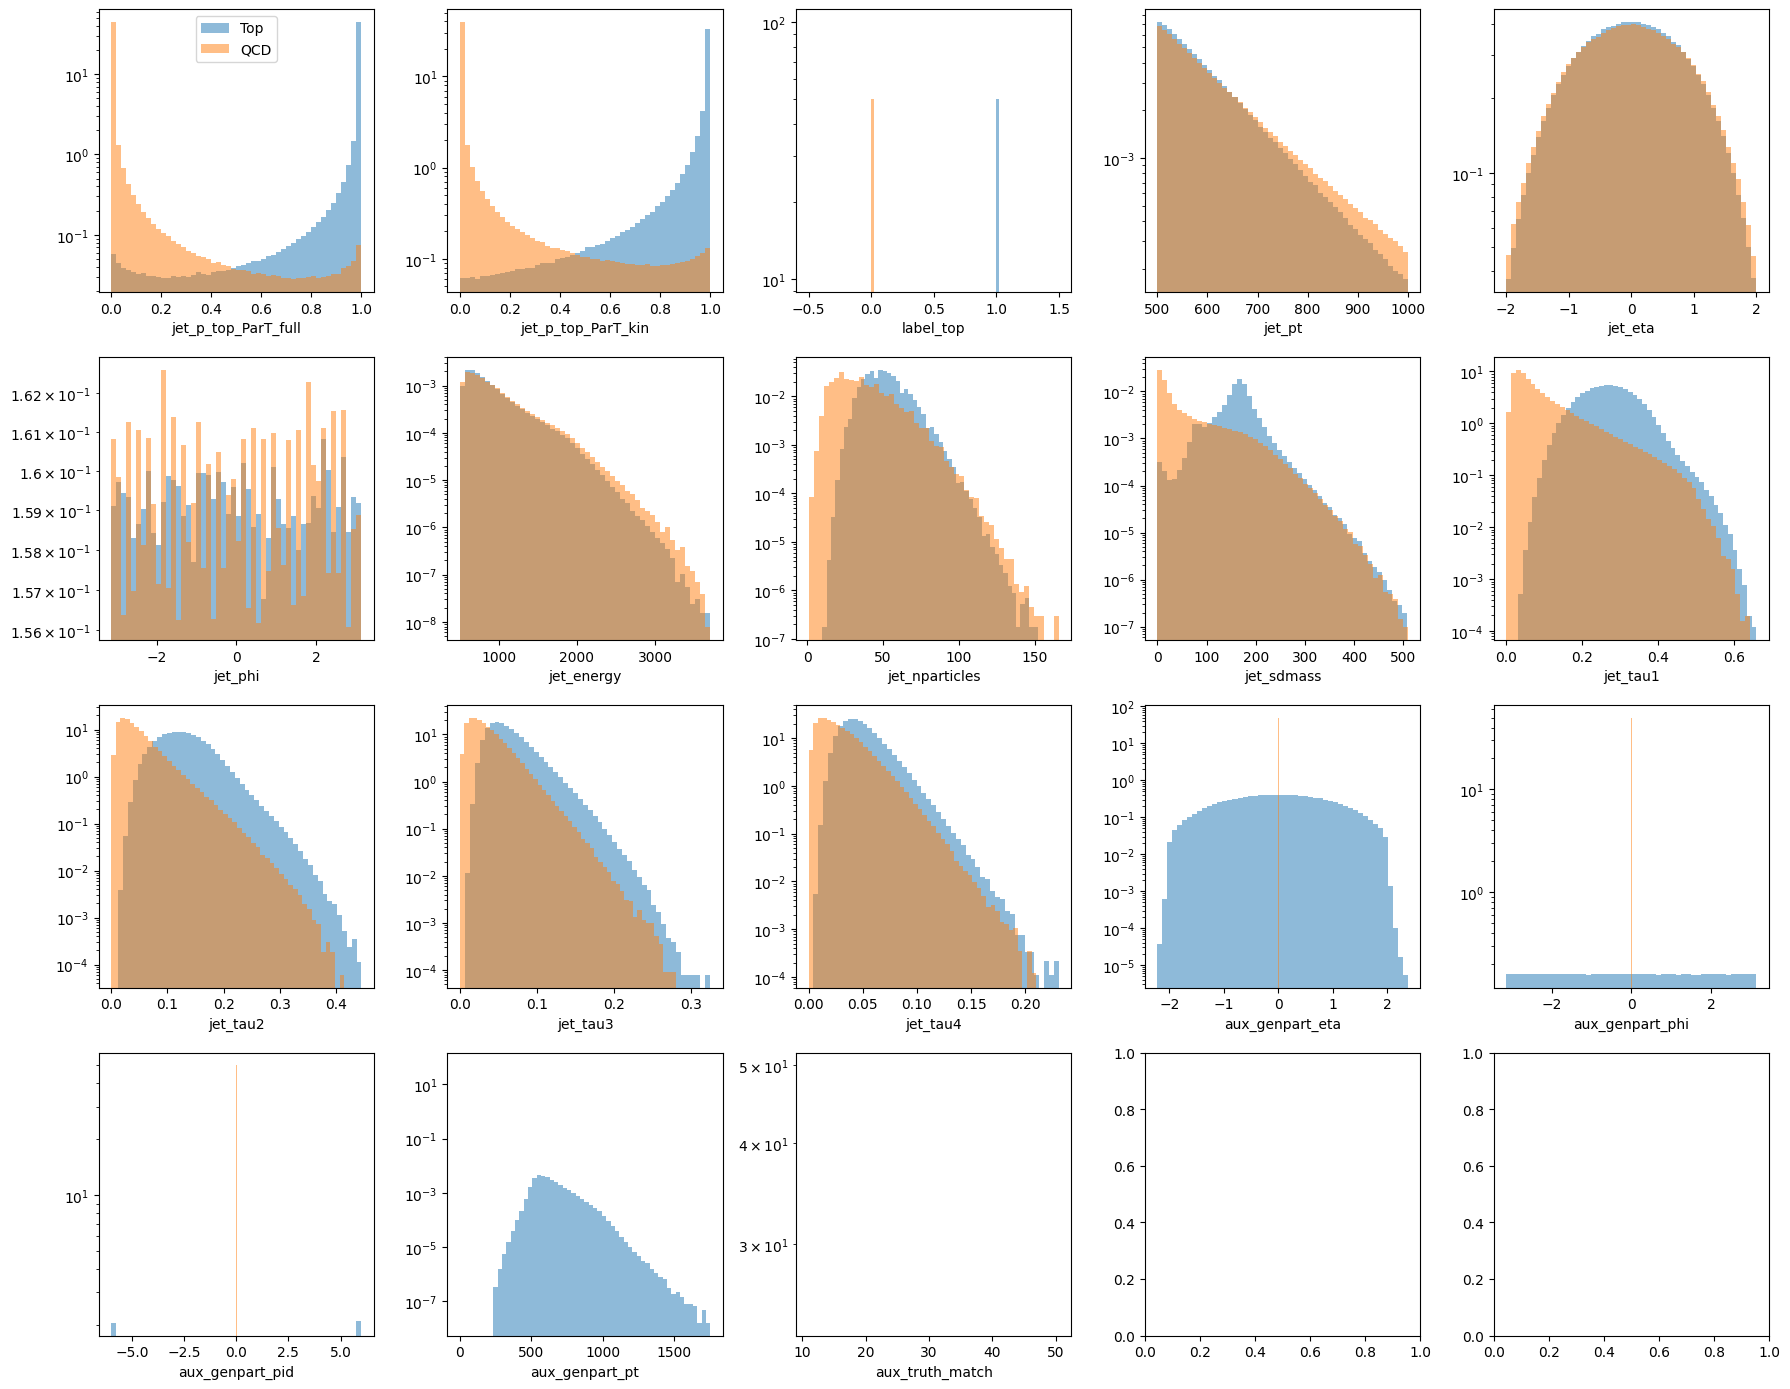

Val


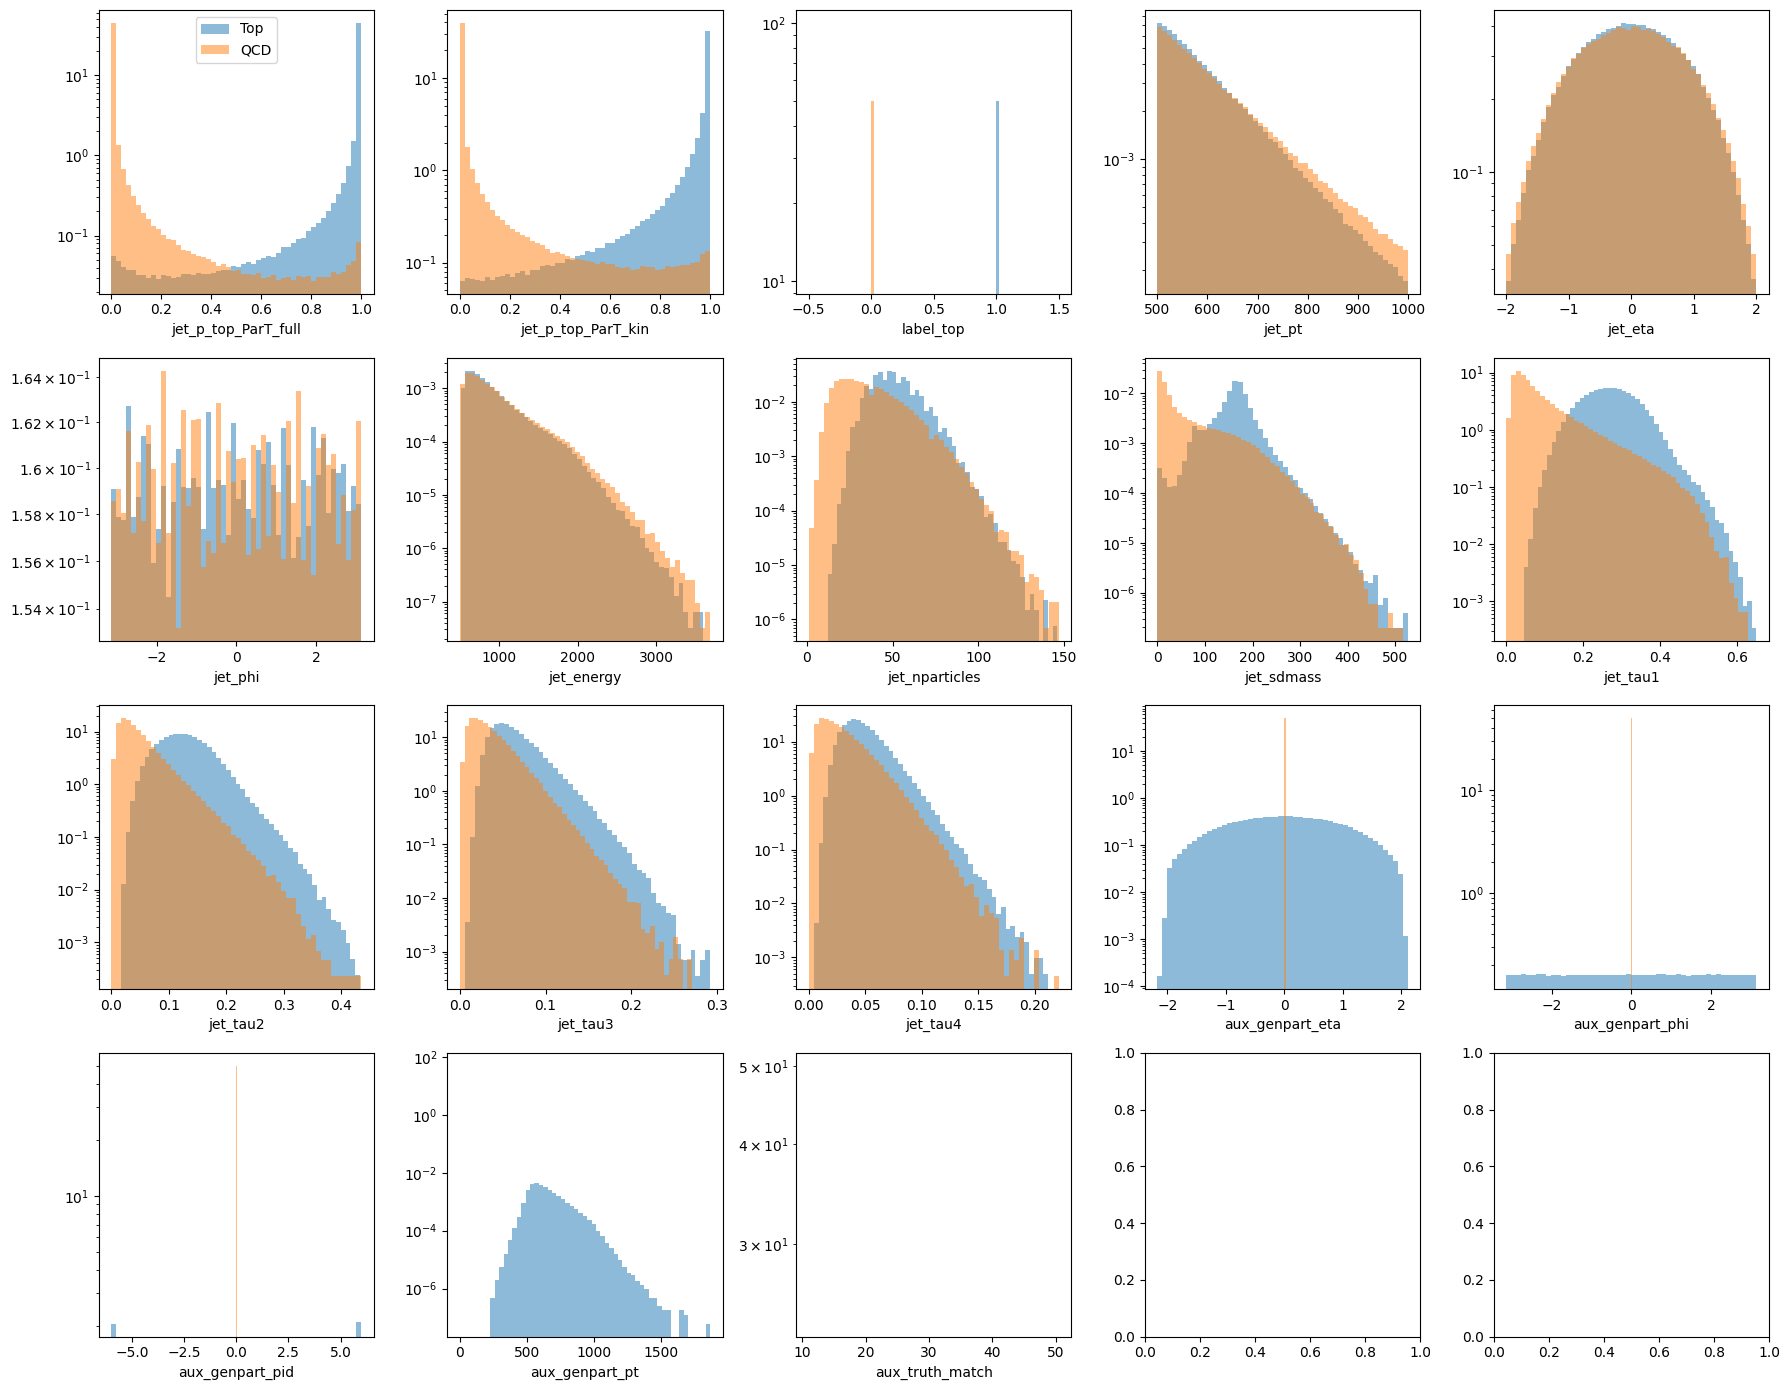

Test


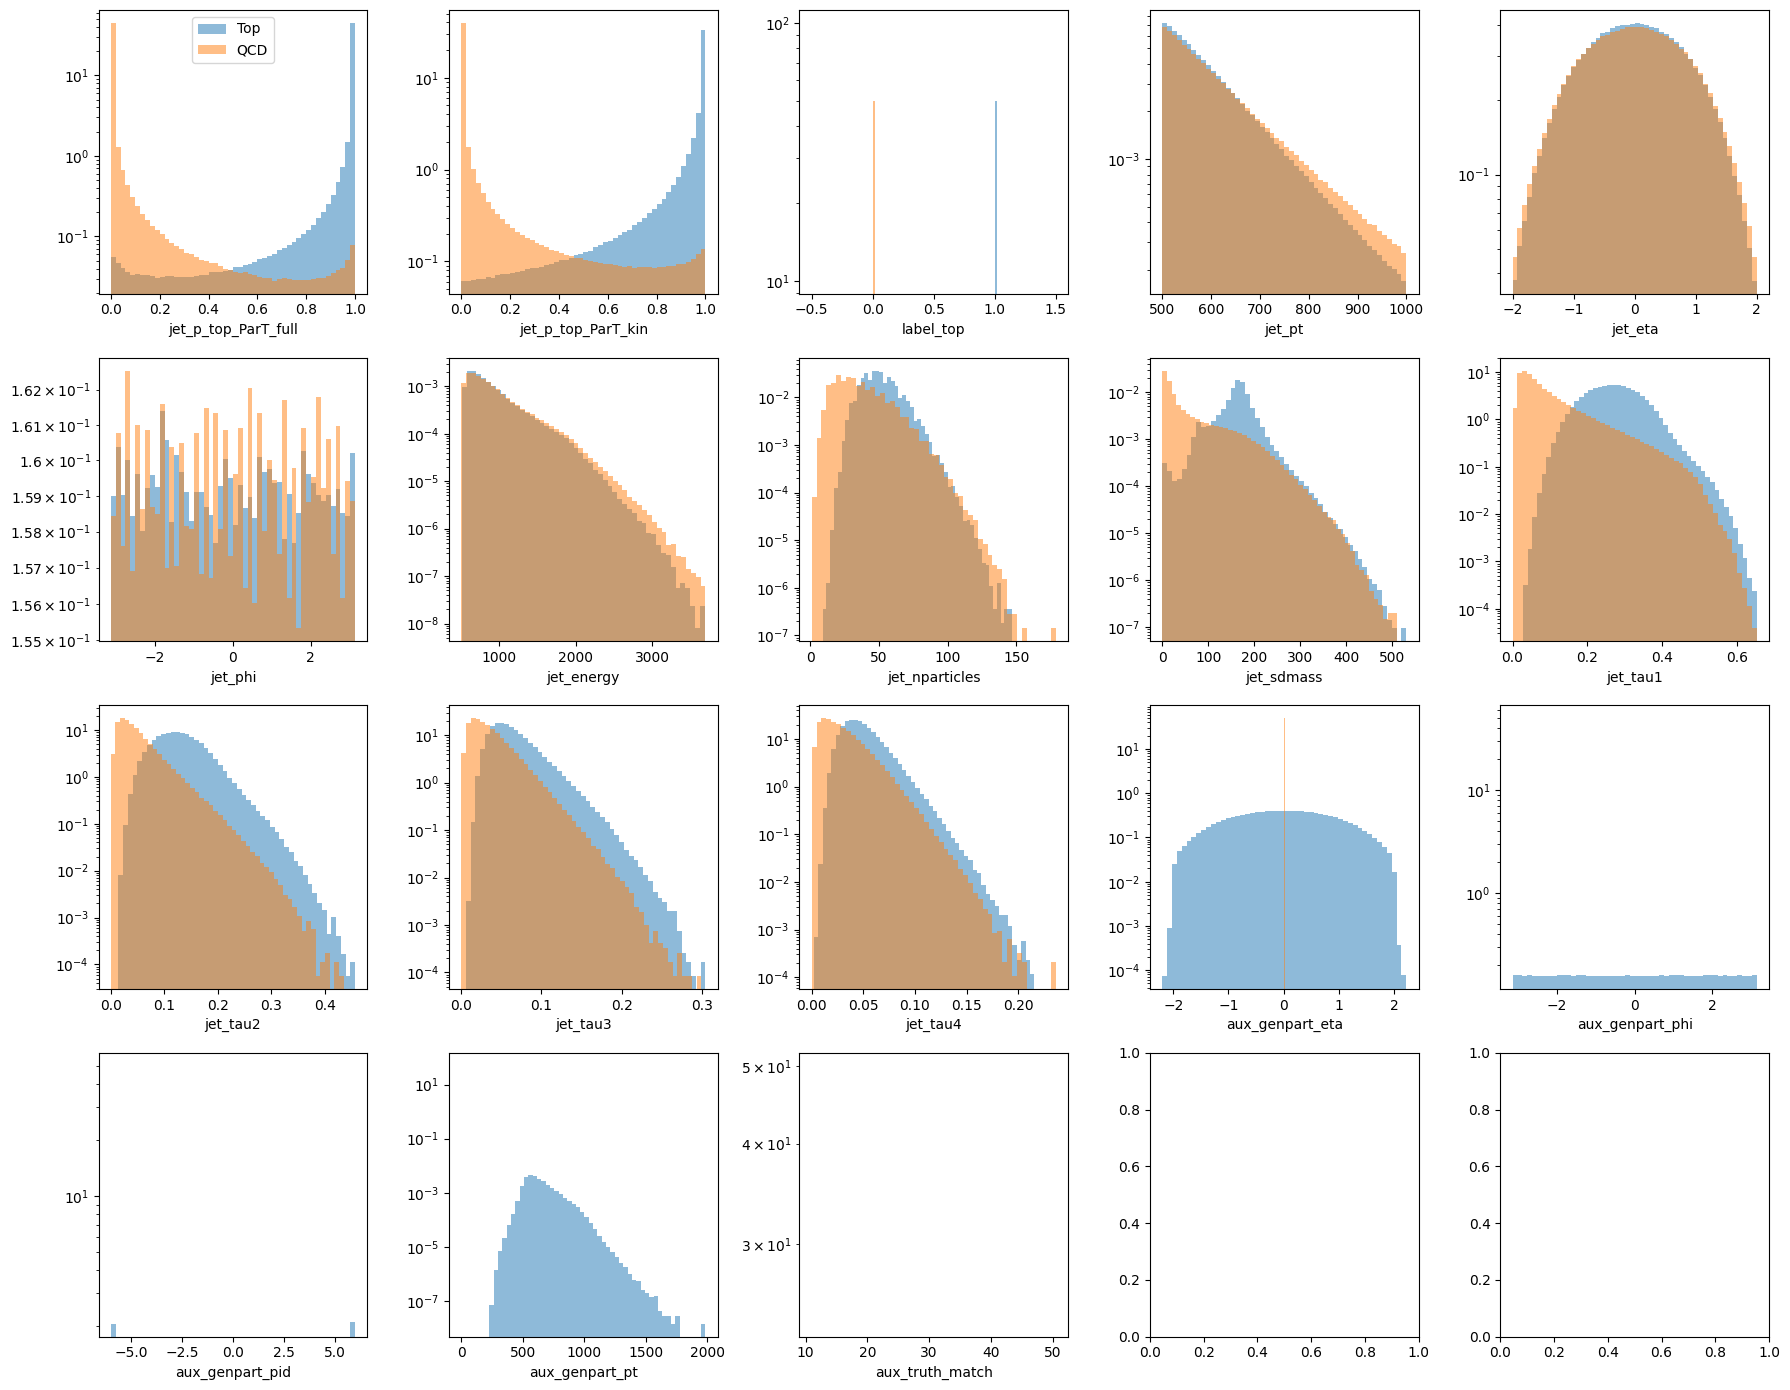

In [9]:
vars_to_plot = list(df_test.columns)

def plot_vars_in_df(df):
    fig, ax = plt.subplots(len(vars_to_plot) // 5 + 1, 5, figsize=(18, 14))
    ax = ax.flatten()
    is_top = df["label_top"] == 1
    hist_kwargs = dict(bins=50, alpha=0.5, density=True)
    for i, var_name in enumerate(vars_to_plot):
        ax[i].hist(df[is_top][var_name], label="Top", **hist_kwargs)
        ax[i].hist(df[~is_top][var_name], label="QCD", **hist_kwargs)
        ax[i].set_xlabel(var_name)
        ax[i].set_yscale("log")
    ax[0].legend()
    plt.tight_layout()
    plt.show()
    
print("Train")
plot_vars_in_df(df_train)
print("Val")
plot_vars_in_df(df_val)
print("Test")
plot_vars_in_df(df_test)